# Lasso and Ridge Linear Regression with Cross-validation


## This notebook is identical in structure to 3b, the only difference being that this employs **_Polynomial Features_** 


#### This notebook has four main sections

## A. Imports, data shaping, and preprocessing
## B. Lasso CV regression on all features
## C. Lasso and Ridge regression on all features except `rating_count`
## D. Lasso and Ridge regression on all features except rating count but with also `budget` added as a feature

# A. Imports and data shaping

In [736]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns

from matplotlib import pyplot as plt
from collections import defaultdict
#from IPython.core.display import display, HTML
import pickle
import copy
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import train_test_split
#display(HTML(my_html))     # make sure Jupyter knows to display it as HTML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [ ]:
director = 'godard'
#director = 'hitchcock'
#director = 'bergman'
#director = 'fassbinder'
#director = 'herzog'
#director = 'allen'
#director='herzog'

In [568]:

pd.options.display.float_format = "{:,.5f}".format

In [569]:

dir_str = director + '/'

films_filename = 'films_to_analyze_' + director +'.pickle'
with open(dir_str + films_filename, 'rb') as read_file:
    films_to_analyze = pickle.load(read_file)

In [570]:
films_to_analyze.head(100)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
1,Fireball: Visitors from Darker Worlds,"2,020.00000",13 November 2020 (Australia),97.00000,97.00000,NaN,NaN,NaN,NaN,7.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,"Family Romance, LLC","2,019.00000",3 July 2020 (USA),89.00000,89.00000,NaN,"3,126.00000","3,126.00000",NaN,6.70000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Nomad: In the Footsteps of Bruce Chatwin,"2,019.00000",26 August 2020 (USA),85.00000,85.00000,NaN,"78,100.00000","78,100.00000",NaN,6.90000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Meeting Gorbachev,"2,018.00000",3 May 2019 (USA),90.00000,90.00000,NaN,"327,912.00000","319,230.00000","327,912.00000",7.20000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,Into the Inferno,"2,016.00000",28 October 2016 (USA),104.00000,104.00000,NaN,"4,861.00000","3,679.00000","4,861.00000",7.20000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,Salt and Fire,"2,016.00000",7 April 2017 (USA),98.00000,98.00000,NaN,"23,888.00000","23,888.00000",NaN,4.20000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,Lo and Behold: Reveries of the Connected World,"2,016.00000",19 August 2016 (USA),98.00000,98.00000,NaN,"765,796.00000","765,796.00000",NaN,7.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8,Queen of the Desert,"2,015.00000",14 April 2017 (USA),128.00000,128.00000,"15,000,000.00000","1,578,543.00000","1,592,853.00000","1,578,543.00000",5.70000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,On Death Row,"2,012.00000",9 March 2012 (USA),49.00000,49.00000,NaN,NaN,NaN,NaN,8.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10,From One Second to the Next,"2,013.00000",7 August 2013 (USA),34.00000,34.00000,NaN,NaN,NaN,NaN,7.40000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [571]:
prevalent_actors_filename  = 'prevalent_actors_' + director +'.pickle'
with open(dir_str + prevalent_actors_filename, 'rb') as read_file:
    prevalent_actor_columns = pickle.load(read_file)

In [572]:
prevalent_actor_columns

Index(['Werner Herzog', 'Klaus Kinski', 'Volker Prechtel', 'Brad Dourif',
       'Peter Berling', 'Clemens Scheitz', 'Michael Shannon', 'Eva Mattes'],
      dtype='object')

In [573]:
pickled_dict_of_actors_filename = 'dict_of_actors_' + director +'.pickle'
with open(dir_str + pickled_dict_of_actors_filename, 'rb') as read_file:
    dict_of_all_actors  = pickle.load(read_file) 

In [574]:
analysis_columns = ['title', 'year', 'duration', 'cinematographer', 'documentary', 'tv_series','rating', 'rating_count', *prevalent_actor_columns]

In [575]:
analysis_columns

['title',
 'year',
 'duration',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating',
 'rating_count',
 'Werner Herzog',
 'Klaus Kinski',
 'Volker Prechtel',
 'Brad Dourif',
 'Peter Berling',
 'Clemens Scheitz',
 'Michael Shannon',
 'Eva Mattes']

## Dataset partitioned for analysis
except one-hot-encoding `cinematographer`

In [576]:
films_to_analyze.head()

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
1,Fireball: Visitors from Darker Worlds,"2,020.00000",13 November 2020 (Australia),97.00000,97.00000,NaN,NaN,NaN,NaN,7.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,"Family Romance, LLC","2,019.00000",3 July 2020 (USA),89.00000,89.00000,NaN,"3,126.00000","3,126.00000",NaN,6.70000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Nomad: In the Footsteps of Bruce Chatwin,"2,019.00000",26 August 2020 (USA),85.00000,85.00000,NaN,"78,100.00000","78,100.00000",NaN,6.90000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Meeting Gorbachev,"2,018.00000",3 May 2019 (USA),90.00000,90.00000,NaN,"327,912.00000","319,230.00000","327,912.00000",7.20000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,Into the Inferno,"2,016.00000",28 October 2016 (USA),104.00000,104.00000,NaN,"4,861.00000","3,679.00000","4,861.00000",7.20000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [577]:
films_and_features_to_analyze_df = films_to_analyze[analysis_columns]

In [578]:
films_and_features_to_analyze_df.head() 

,title,year,duration,cinematographer,documentary,tv_series,rating,rating_count,Werner Herzog,Klaus Kinski,Volker Prechtel,Brad Dourif,Peter Berling,Clemens Scheitz,Michael Shannon,Eva Mattes
1,Fireball: Visitors from Darker Worlds,"2,020.00000",97.00000,Peter Zeitlinger,1.00000,0.00000,7.00000,"1,439.00000",1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,"Family Romance, LLC","2,019.00000",89.00000,Werner Herzog,0.00000,0.00000,6.70000,"1,913.00000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,Nomad: In the Footsteps of Bruce Chatwin,"2,019.00000",85.00000,Louis Caulfield,1.00000,0.00000,6.90000,551.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Meeting Gorbachev,"2,018.00000",90.00000,Yuri Burak,1.00000,0.00000,7.20000,"1,694.00000",1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,Into the Inferno,"2,016.00000",104.00000,Peter Zeitlinger,1.00000,0.00000,7.20000,"7,392.00000",1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [579]:
cinematographer_include_threshold = films_and_features_to_analyze_df['cinematographer'].value_counts().min()
cinematographer_include_threshold

1

In [580]:
value_counts = films_and_features_to_analyze_df['cinematographer'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= cinematographer_include_threshold].index
films_and_features_to_analyze_df['cinematographer'].replace(to_remove, 'OTHER', inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Regression analysis on `rating`,  `duration`, and `year` etc

#### `rating` as target

### Selecting columns for Train Test Split

In [581]:
films_and_features_to_analyze_df.columns # review columns we start with

Index(['title', 'year', 'duration', 'cinematographer', 'documentary',
       'tv_series', 'rating', 'rating_count', 'Werner Herzog', 'Klaus Kinski',
       'Volker Prechtel', 'Brad Dourif', 'Peter Berling', 'Clemens Scheitz',
       'Michael Shannon', 'Eva Mattes'],
      dtype='object')

In [582]:
selected_cols = [*films_and_features_to_analyze_df.columns[1:6], *films_and_features_to_analyze_df.columns[7:]]

In [583]:
selected_cols

['year',
 'duration',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating_count',
 'Werner Herzog',
 'Klaus Kinski',
 'Volker Prechtel',
 'Brad Dourif',
 'Peter Berling',
 'Clemens Scheitz',
 'Michael Shannon',
 'Eva Mattes']

In [584]:
X= films_and_features_to_analyze_df[selected_cols]
y= films_and_features_to_analyze_df['rating']

In [585]:
y.isnull().values.any()

False

### Train-val vs. test split

In [586]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [587]:
X_test

,year,duration,cinematographer,documentary,tv_series,rating_count,Werner Herzog,Klaus Kinski,Volker Prechtel,Brad Dourif,Peter Berling,Clemens Scheitz,Michael Shannon,Eva Mattes
1,"2,020.00000",97.00000,Peter Zeitlinger,1.00000,0.00000,"1,439.00000",1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,"2,016.00000",98.00000,Peter Zeitlinger,0.00000,0.00000,"2,458.00000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
40,"1,990.00000",91.00000,OTHER,1.00000,0.00000,566.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
51,"1,981.00000",44.00000,Thomas Mauch,1.00000,1.00000,732.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
14,"2,010.00000",90.00000,OTHER,1.00000,0.00000,"7,766.00000",1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
62,"1,971.00000",42.00000,Jörg Schmidt-Reitwein,1.00000,1.00000,393.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
36,"1,992.00000",54.00000,OTHER,1.00000,0.00000,"5,376.00000",1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
55,"1,977.00000",115.00000,Thomas Mauch,0.00000,0.00000,"13,072.00000",0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
13,"2,011.00000",39.00000,Werner Herzog,1.00000,0.00000,127.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
65,"1,970.00000",96.00000,Thomas Mauch,0.00000,0.00000,"5,446.00000",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## Preprocessing

### Categorical Variable Preprocessing

#### One-hot-encoding

In [588]:
cat_ohe_vars = ['cinematographer']
X_train_val_cat_ohe = X_train_val[cat_ohe_vars]
#X_train_cat_ohe 

In [589]:
ohe = OneHotEncoder(sparse=False,  handle_unknown='ignore')
ohe.fit(X_train_val_cat_ohe)
cat_ohe = ohe.transform(X_train_val_cat_ohe)

In [590]:
columns=ohe.get_feature_names(cat_ohe_vars)
columns

array(['cinematographer_Henning Brümmer',
       'cinematographer_Jörg Schmidt-Reitwein', 'cinematographer_OTHER',
       'cinematographer_Peter Zeitlinger',
       'cinematographer_Rainer Klausmann', 'cinematographer_Thomas Mauch',
       'cinematographer_Werner Herzog'], dtype=object)

In [591]:
X_train_val_cat_ohe_df = pd.DataFrame(cat_ohe, columns=columns, index=X_train_val_cat_ohe.index)
X_train_val_cat_ohe_df.head()

,cinematographer_Henning Brümmer,cinematographer_Jörg Schmidt-Reitwein,cinematographer_OTHER,cinematographer_Peter Zeitlinger,cinematographer_Rainer Klausmann,cinematographer_Thomas Mauch,cinematographer_Werner Herzog
34,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
60,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
19,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
9,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


Repeating transformations on testing set

In [592]:
X_test_cat_ohe = X_test[['cinematographer']]
X_test_cat_ohe
cat_ohe_test = ohe.transform(X_test_cat_ohe)

cat_ohe_columns = ohe.get_feature_names(['cinematographer'])
X_test_cat_ohe_df = pd.DataFrame(cat_ohe_test, columns=cat_ohe_columns)


### Continuous Variable Preprocessing

In [593]:
cont_column_names = ['year', 'duration', 'rating_count']
X_train_val_cont = X_train_val[cont_column_names ]

X_test_cont      = X_test[     cont_column_names ]


X_train_val_cont.head()


,year,duration,rating_count
34,"1,995.00000",59.00000,679.00000
4,"2,018.00000",90.00000,"1,694.00000"
60,"1,974.00000",45.00000,"2,304.00000"
19,"2,007.00000",99.00000,"17,182.00000"
9,"2,012.00000",49.00000,"1,090.00000"


#### Generate log and polynomials

In [594]:
#X_train_val_cont_poly.head()

In [595]:
X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
X_train_val_cont['log_rating_count'] = np.log(X_train_val_cont.rating_count)


X_test_cont['log_year']         = np.log(X_test_cont.year)
X_test_cont['log_rating_count'] = np.log(X_test_cont.rating_count)

<ipython-input-595-d30627963e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
<ipython-input-595-d30627963e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_rating_count'] = np.log(X_train_val_cont.rating_count)
<ipython-input-595-d30627963e3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [596]:
X_test_cont.shape[0]

12

#### Concatenate columns

In [597]:
cat_columns = ['documentary', 'tv_series', *prevalent_actor_columns]
X_train_val_cat_df = X_train_val[cat_columns]
#X_train_val_cat_df

X_test_cat_df = X_test[cat_columns]
#X_train_val_cat_df

In [598]:
X_test_cat_df.isnull().values.any()

False

In [599]:
X_train_val_combo= pd.concat([X_train_val_cont, X_train_val_cat_ohe_df, X_train_val_cat_df, ], axis='columns')
X_test_combo = pd.concat([X_test_cont.reset_index(drop=True), X_test_cat_ohe_df.reset_index(drop=True), X_test_cat_df.reset_index(drop=True), ], axis='columns')

In [600]:
X_test_cat_df.shape

(12, 10)

In [601]:
X_train_val_combo.isnull().values.any()

False

In [602]:
X_test_combo.isnull().values.any()

False

In [603]:
X_test_combo

,year,duration,rating_count,log_year,log_rating_count,cinematographer_Henning Brümmer,cinematographer_Jörg Schmidt-Reitwein,cinematographer_OTHER,cinematographer_Peter Zeitlinger,cinematographer_Rainer Klausmann,...,documentary,tv_series,Werner Herzog,Klaus Kinski,Volker Prechtel,Brad Dourif,Peter Berling,Clemens Scheitz,Michael Shannon,Eva Mattes
0,"2,020.00000",97.00000,"1,439.00000",7.61085,7.27170,0.00000,0.00000,0.00000,1.00000,0.00000,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,"2,016.00000",98.00000,"2,458.00000",7.60887,7.80710,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,"1,990.00000",91.00000,566.00000,7.59589,6.33859,0.00000,0.00000,1.00000,0.00000,0.00000,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,"1,981.00000",44.00000,732.00000,7.59136,6.59578,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,"2,010.00000",90.00000,"7,766.00000",7.60589,8.95751,0.00000,0.00000,1.00000,0.00000,0.00000,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,"1,971.00000",42.00000,393.00000,7.58630,5.97381,0.00000,1.00000,0.00000,0.00000,0.00000,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,"1,992.00000",54.00000,"5,376.00000",7.59689,8.58970,0.00000,0.00000,1.00000,0.00000,0.00000,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,"1,977.00000",115.00000,"13,072.00000",7.58934,9.47823,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
8,"2,011.00000",39.00000,127.00000,7.60639,4.84419,0.00000,0.00000,0.00000,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,"1,970.00000",96.00000,"5,446.00000",7.58579,8.60264,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [604]:
selected_columns = X_train_val_combo.columns
X_train_val_combo.columns

Index(['year', 'duration', 'rating_count', 'log_year', 'log_rating_count',
       'cinematographer_Henning Brümmer',
       'cinematographer_Jörg Schmidt-Reitwein', 'cinematographer_OTHER',
       'cinematographer_Peter Zeitlinger', 'cinematographer_Rainer Klausmann',
       'cinematographer_Thomas Mauch', 'cinematographer_Werner Herzog',
       'documentary', 'tv_series', 'Werner Herzog', 'Klaus Kinski',
       'Volker Prechtel', 'Brad Dourif', 'Peter Berling', 'Clemens Scheitz',
       'Michael Shannon', 'Eva Mattes'],
      dtype='object')

### Train vs. val split

In [605]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_combo, y_train_val, test_size=.25, random_state=43)

In [606]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

#mae(y_test, test_set_pred)

### Lasso CV

In [607]:
X_train_val_combo.values

array([[1.9950e+03, 5.9000e+01, 6.7900e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0180e+03, 9.0000e+01, 1.6940e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9740e+03, 4.5000e+01, 2.3040e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9980e+03, 4.5000e+01, 1.1000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9740e+03, 1.1000e+02, 1.6417e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9890e+03, 5.2000e+01, 6.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

## B. Lasso CV regression on all features

### Polynomial testing

In [608]:
X_train_val_combo_columns = X_train_val_combo.columns
poly = PolynomialFeatures(degree=2)
X_train_val_combo_poly =  poly.fit_transform(X_train_val_combo)
X_test_combo_poly = poly.transform(X_test_combo)
X_train_val_combo_poly_columns = poly.get_feature_names(X_train_val_combo_columns)



In [609]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train_val_combo_poly)
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train_val_combo_poly)
X_te = std.transform(X_test_combo_poly)

In [610]:
X_train_val_combo_poly_columns[:29]

['1',
 'year',
 'duration',
 'rating_count',
 'log_year',
 'log_rating_count',
 'cinematographer_Henning Brümmer',
 'cinematographer_Jörg Schmidt-Reitwein',
 'cinematographer_OTHER',
 'cinematographer_Peter Zeitlinger',
 'cinematographer_Rainer Klausmann',
 'cinematographer_Thomas Mauch',
 'cinematographer_Werner Herzog',
 'documentary',
 'tv_series',
 'Werner Herzog',
 'Klaus Kinski',
 'Volker Prechtel',
 'Brad Dourif',
 'Peter Berling',
 'Clemens Scheitz',
 'Michael Shannon',
 'Eva Mattes',
 'year^2',
 'year duration',
 'year rating_count',
 'year log_year',
 'year log_rating_count',
 'year cinematographer_Henning Brümmer']

In [611]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,500)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train_val)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012770729425828353, tolerance: 0.0010922105263157893
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001244132208402915, tolerance: 0.0010922105263157893
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001978464938438229, tolerance: 0.001617
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([1.00000000e-02, 1.01862899e-02, 1.03760502e-02, 1.05693455e-02,
       1.07662418e-02, 1.09668060e-02, 1.11711065e-02, 1.13792129e-02,
       1.15911962e-02, 1.18071285e-02, 1.20270833e-02, 1.22511358e-02,
       1.24793621e-02, 1.27118400e-02, 1.29486487e-02, 1.31898690e-02,
       1.34355829e-02, 1.36858742e-02, 1.39408283e-02, 1.42005318e-02,
       1.44650734e-02, 1.47345431e-0...
       6.54080591e+01, 6.66265452e+01, 6.78677305e+01, 6.91320378e+01,
       7.04198979e+01, 7.17317494e+01, 7.30680395e+01, 7.44292233e+01,
       7.58157646e+01, 7.72281357e+01, 7.86668179e+01, 8.01323013e+01,
       8.16250851e+01, 8.31456781e+01, 8.46945981e+01, 8.62723729e+01,
       8.78795401e+01, 8.95166472e+01, 9.11842520e+01, 9.28829225e+01,
       9.46132376e+01, 9.63757866e+01, 9.81711702e+01, 1.00000000e+02]),
        cv=5)

In [612]:
# This is the best alpha value it found 
lasso_model.alpha_

0.0331926620473319

In [613]:
len(lasso_model.coef_)

276

In [614]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_train_val_combo_poly_columns, lasso_model.coef_))
coefficients

[('1', 0.0),
 ('year', -0.0783976345705641),
 ('duration', -0.0),
 ('rating_count', 0.11253308805438092),
 ('log_year', -0.0029260430691382816),
 ('log_rating_count', 0.0),
 ('cinematographer_Henning Brümmer', 0.0),
 ('cinematographer_Jörg Schmidt-Reitwein', 0.0),
 ('cinematographer_OTHER', -0.0),
 ('cinematographer_Peter Zeitlinger', -0.0),
 ('cinematographer_Rainer Klausmann', -0.0),
 ('cinematographer_Thomas Mauch', 0.0),
 ('cinematographer_Werner Herzog', -0.0),
 ('documentary', 0.0),
 ('tv_series', -0.0),
 ('Werner Herzog', 0.0),
 ('Klaus Kinski', 0.0),
 ('Volker Prechtel', -0.0),
 ('Brad Dourif', -0.07946390733231475),
 ('Peter Berling', 0.0),
 ('Clemens Scheitz', -0.0),
 ('Michael Shannon', 0.0),
 ('Eva Mattes', 0.0),
 ('year^2', -0.014372156432481227),
 ('year duration', -0.0),
 ('year rating_count', 0.0),
 ('year log_year', -0.0),
 ('year log_rating_count', 0.0),
 ('year cinematographer_Henning Brümmer', 0.0),
 ('year cinematographer_Jörg Schmidt-Reitwein', 0.0),
 ('year cinem

In [615]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

In [616]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.5523747253560366

In [617]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 

0.28105044088646736

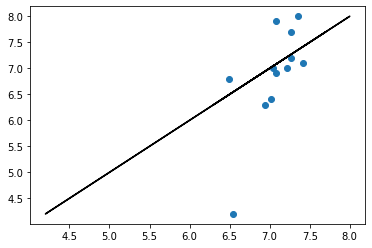

In [618]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

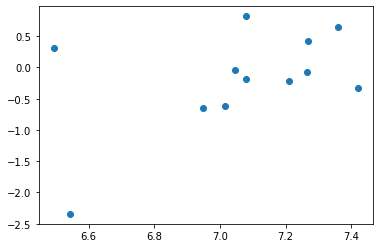

In [619]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)

In [620]:
coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])

coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df.head(20)

,Feature,Coefficient
113,log_rating_count documentary,0.13644
232,tv_series Werner Herzog,0.11705
175,cinematographer_Peter Zeitlinger documentary,0.11566
200,cinematographer_Thomas Mauch documentary,-0.11418
3,rating_count,0.11253
57,duration tv_series,-0.11096
52,duration cinematographer_Peter Zeitlinger,-0.10292
18,Brad Dourif,-0.07946
1,year,-0.07840
59,duration Klaus Kinski,0.07458


In [621]:
Lasso_CV_model_w_rc = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Lasso_CV_model_w_rc 

{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.5523747253560366,
 'coefficients':                                           Feature  Coefficient
 113                  log_rating_count documentary      0.13644
 232                       tv_series Werner Herzog      0.11705
 175  cinematographer_Peter Zeitlinger documentary      0.11566
 200      cinematographer_Thomas Mauch documentary     -0.11418
 3                                    rating_count      0.11253
 ..                                            ...          ...
 103                      log_year Michael Shannon      0.00000
 104                           log_year Eva Mattes      0.00000
 105                            log_rating_count^2      0.00000
 108        log_rating_count cinematographer_OTHER     -0.00000
 275                                  Eva Mattes^2      0.00000
 
 [276 rows x 2 columns]}

In [622]:
LCVM_w_rc_filename = 'Lasso_CV_model_w_rc_poly_' + director
with open(dir_str + LCVM_w_rc_filename, 'wb') as to_write:
    pickle.dump(Lasso_CV_model_w_rc, to_write)

## C. Lasso and Ridge regression on all features except rating count

### Rerun the model without using `rating_count`

In [623]:
X_tr_no_rc = X_train_val_combo.drop(columns = ['rating_count', 'log_rating_count'])

In [624]:
X_te_no_rc = X_test_combo.drop(columns = ['rating_count', 'log_rating_count'])

In [625]:
#X_tr = pd.DataFrame(X_tr, columns=X_train.columns )
#X_tr.head()

In [626]:
#X_te = pd.DataFrame(X_te, columns=X_train.columns )

In [627]:
#X_tr_no_rc  = X_tr.drop(columns = ['rating_count', 'log_rating_count'])

In [628]:
#X_te_no_rc = X_te.drop(columns = ['rating_count', 'log_rating_count'])

In [629]:
X_tr_no_rc_columns = X_tr_no_rc.columns
poly = PolynomialFeatures(degree=2)

X_tr_no_rc_poly =  poly.fit_transform(X_tr_no_rc )
X_te_no_rc_poly = poly.transform(X_te_no_rc)

X_tr_no_rc_poly_columns = poly.get_feature_names(X_tr_no_rc_columns)

In [630]:
## Scale the data as before
std = StandardScaler()
std.fit(X_tr_no_rc_poly)
## Scale the Predictors on both the train and test set
X_tr_no_rc_poly_st = std.transform(X_tr_no_rc_poly)
X_te_no_rc_poly_st = std.transform(X_te_no_rc_poly)

In [631]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr_no_rc_poly_st, y_train_val)

# This is the best alpha value it found 
lasso_model.alpha_

0.016451905877536626

In [632]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_tr_no_rc_poly_columns, lasso_model.coef_))
coefficients_df = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)



In [633]:
len(coefficients_df)
#lasso_model.coef_

231

In [634]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te_no_rc_poly_st)

In [635]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.6422233480183597

In [636]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 


0.20831919774479923

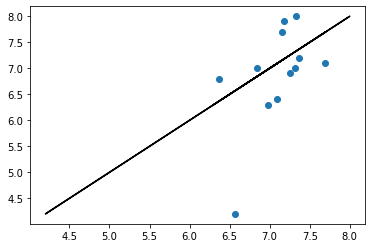

In [637]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')
#plt.plot( x_te_no_rc, y_test, c='k')

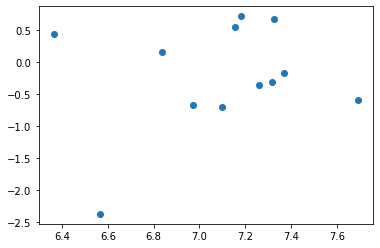

In [638]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)



In [639]:
coefficients_df.head(30)

,Feature,Coefficient
187,tv_series Werner Herzog,0.19030
130,cinematographer_Peter Zeitlinger documentary,0.17329
53,duration Klaus Kinski,0.09330
158,cinematographer_Thomas Mauch Klaus Kinski,0.08087
178,documentary Werner Herzog,0.06859
105,cinematographer_Jörg Schmidt-Reitwein Volker P...,0.06282
68,log_year documentary,0.05037
132,cinematographer_Peter Zeitlinger Werner Herzog,0.02843
50,duration documentary,0.02538
85,cinematographer_Henning Brümmer documentary,0.01722


In [640]:
Lasso_CV_model_no_rc = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Lasso_CV_model_no_rc 


{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.6422233480183597,
 'coefficients':                                               Feature  Coefficient
 187                           tv_series Werner Herzog      0.19030
 130      cinematographer_Peter Zeitlinger documentary      0.17329
 53                              duration Klaus Kinski      0.09330
 158         cinematographer_Thomas Mauch Klaus Kinski      0.08087
 178                         documentary Werner Herzog      0.06859
 ..                                                ...          ...
 147  cinematographer_Rainer Klausmann Volker Prechtel     -0.07716
 1                                                year     -0.09036
 46          duration cinematographer_Peter Zeitlinger     -0.09486
 155          cinematographer_Thomas Mauch documentary     -0.11569
 51                                 duration tv_series     -

In [641]:
LCVM_no_rc_filename = 'Lasso_CV_model_no_rc_poly_' + director
with open(dir_str + LCVM_no_rc_filename, 'wb') as to_write:
    pickle.dump(Lasso_CV_model_no_rc, to_write)

In [642]:
from sklearn.linear_model import lars_path
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(np.array(X_tr_no_rc), y_train_val.values, method='lasso')

Computing regularization path using the LARS ...


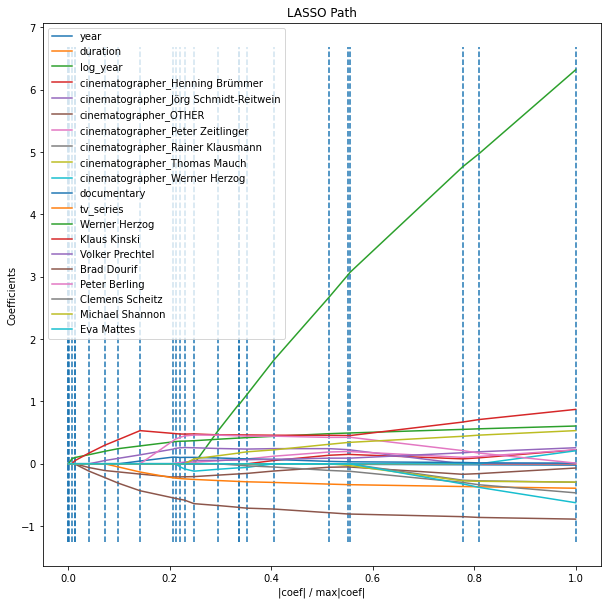

In [643]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_tr_no_rc.columns)
plt.show()

### Ridge regression

In [644]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr_no_rc_poly_st, y_train_val)

# This is the best alpha value it found 
ridge_model.alpha_

100.0

In [645]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_tr_no_rc_poly_columns, ridge_model.coef_))

coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])

coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df

,Feature,Coefficient
156,cinematographer_Thomas Mauch tv_series,-0.03438
155,cinematographer_Thomas Mauch documentary,-0.03438
187,tv_series Werner Herzog,0.02956
130,cinematographer_Peter Zeitlinger documentary,0.02702
132,cinematographer_Peter Zeitlinger Werner Herzog,0.02683
...,...,...
134,cinematographer_Peter Zeitlinger Volker Prechtel,0.00000
129,cinematographer_Peter Zeitlinger cinematograph...,0.00000
128,cinematographer_Peter Zeitlinger cinematograph...,0.00000
127,cinematographer_Peter Zeitlinger cinematograph...,0.00000


In [646]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te_no_rc_poly_st)

In [647]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

0.6180286964290235

In [648]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 


0.12820497906245987

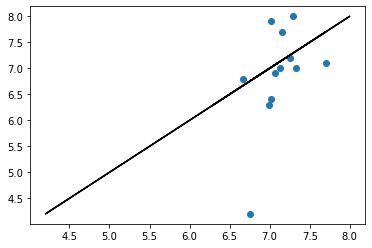

In [649]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

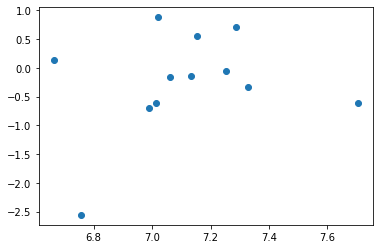

In [650]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)


In [651]:
coefficients_df.head()

,Feature,Coefficient
156,cinematographer_Thomas Mauch tv_series,-0.03438
155,cinematographer_Thomas Mauch documentary,-0.03438
187,tv_series Werner Herzog,0.02956
130,cinematographer_Peter Zeitlinger documentary,0.02702
132,cinematographer_Peter Zeitlinger Werner Herzog,0.02683


In [652]:
Ridge_CV_model_no_rc = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Ridge_CV_model_no_rc 


{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.6180286964290235,
 'coefficients':                                                Feature  Coefficient
 156             cinematographer_Thomas Mauch tv_series     -0.03438
 155           cinematographer_Thomas Mauch documentary     -0.03438
 187                            tv_series Werner Herzog      0.02956
 130       cinematographer_Peter Zeitlinger documentary      0.02702
 132     cinematographer_Peter Zeitlinger Werner Herzog      0.02683
 ..                                                 ...          ...
 134   cinematographer_Peter Zeitlinger Volker Prechtel      0.00000
 129  cinematographer_Peter Zeitlinger cinematograph...      0.00000
 128  cinematographer_Peter Zeitlinger cinematograph...      0.00000
 127  cinematographer_Peter Zeitlinger cinematograph...      0.00000
 115  cinematographer_OTHER cinematographer_Werne

In [653]:
RCVM_no_rc_filename = 'Ridge_CV_model_no_rc_poly_' + director +'.pickle'
with open(dir_str + RCVM_no_rc_filename, 'wb') as to_write:
    pickle.dump(Ridge_CV_model_no_rc, to_write)

## D. Lasso and Ridge regression on all features except rating count but with also `budget` added as a feature

### Including `budget` as a feature 
This entails a fewer rows of data, since many of the films don't have budget info available on IMDB

In [689]:
films_to_analyze_financial_df = films_to_analyze[(films_to_analyze['budget'] > 0) & (films_to_analyze['worldwide_gross'] > 0)]

In [690]:
analysis_columns = ['title', 'year', 'duration', 'budget', 'cinematographer', 'documentary', 'tv_series','rating', *prevalent_actor_columns]

In [691]:
analysis_columns 

['title',
 'year',
 'duration',
 'budget',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating',
 'Werner Herzog',
 'Klaus Kinski',
 'Volker Prechtel',
 'Brad Dourif',
 'Peter Berling',
 'Clemens Scheitz',
 'Michael Shannon',
 'Eva Mattes']

In [692]:
films_and_features_to_analyze_df = films_to_analyze_financial_df[analysis_columns]

In [693]:
cinematographer_include_threshold = films_and_features_to_analyze_df['cinematographer'].value_counts().min()
cinematographer_include_threshold

1

In [694]:
value_counts = films_and_features_to_analyze_df['cinematographer'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= cinematographer_include_threshold].index
films_and_features_to_analyze_df['cinematographer'].replace(to_remove, 'OTHER', inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Regression analysis on `rating`,  `duration`, `year` and `budget` etc

In [695]:
films_and_features_to_analyze_df.columns

Index(['title', 'year', 'duration', 'budget', 'cinematographer', 'documentary',
       'tv_series', 'rating', 'Werner Herzog', 'Klaus Kinski',
       'Volker Prechtel', 'Brad Dourif', 'Peter Berling', 'Clemens Scheitz',
       'Michael Shannon', 'Eva Mattes'],
      dtype='object')

In [696]:
selected_cols = [*films_and_features_to_analyze_df.columns[1:7], *films_and_features_to_analyze_df.columns[8:]]

In [697]:
X= films_and_features_to_analyze_df[selected_cols]
y= films_and_features_to_analyze_df['rating']

In [698]:
X

,year,duration,budget,cinematographer,documentary,tv_series,Werner Herzog,Klaus Kinski,Volker Prechtel,Brad Dourif,Peter Berling,Clemens Scheitz,Michael Shannon,Eva Mattes
8,"2,015.00000",128.00000,"15,000,000.00000",Peter Zeitlinger,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
16,"2,009.00000",91.00000,"2,000,000.00000",Peter Zeitlinger,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
18,"2,009.00000",122.00000,"25,000,000.00000",Peter Zeitlinger,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
20,"2,006.00000",120.00000,"10,000,000.00000",Peter Zeitlinger,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
44,"1,987.00000",111.00000,"800,000.00000",OTHER,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
61,"1,972.00000",95.00000,"370,000.00000",OTHER,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


In [699]:
y.isnull().values.any()

False

In [700]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [701]:
# X_train_val

## Preprocessing


### Categorical Variable Preprocessing

#### One-hot-encoding

In [702]:
cat_ohe_vars = ['cinematographer']
X_train_val_cat_ohe = X_train_val[cat_ohe_vars]
#X_train_cat_ohe 

In [703]:
ohe = OneHotEncoder(sparse=False,  handle_unknown='ignore')
ohe.fit(X_train_val_cat_ohe)
cat_ohe = ohe.transform(X_train_val_cat_ohe)

In [704]:
columns=ohe.get_feature_names(cat_ohe_vars)
columns

array(['cinematographer_OTHER', 'cinematographer_Peter Zeitlinger'],
      dtype=object)

In [705]:
cat_ohe.shape[0]

4

In [706]:
X_train_val_cat_ohe.shape[0]

4

In [707]:
X_train_val_cat_ohe_df = pd.DataFrame(cat_ohe, columns=columns, index=X_train_val_cat_ohe.index)
X_train_val_cat_ohe_df.head()

,cinematographer_OTHER,cinematographer_Peter Zeitlinger
61,1.00000,0.00000
18,0.00000,1.00000
44,1.00000,0.00000
20,0.00000,1.00000


In [708]:
X_test_cat_ohe = X_test[['cinematographer']]
X_test_cat_ohe
cat_ohe_test = ohe.transform(X_test_cat_ohe)

cat_ohe_columns = ohe.get_feature_names(['cinematographer'])
X_test_cat_ohe_df = pd.DataFrame(cat_ohe_test, columns=cat_ohe_columns)


### Continuous Variable Preprocessing

In [709]:
cont_column_names = ['year', 'duration', 'budget']
X_train_val_cont = X_train_val[cont_column_names ]

X_test_cont      = X_test[     cont_column_names ]


X_train_val_cont.head()

,year,duration,budget
61,"1,972.00000",95.00000,"370,000.00000"
18,"2,009.00000",122.00000,"25,000,000.00000"
44,"1,987.00000",111.00000,"800,000.00000"
20,"2,006.00000",120.00000,"10,000,000.00000"


In [710]:
X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
X_train_val_cont['log_budget']         = np.log(X_train_val_cont.budget)
#X_train_val_cont['budget_sq'] = X_train_val_cont.budget**2
#X_train_val_cont['budget_per_year'] = X_train_val_cont.budget/X_train_val_cont.year


X_test_cont['log_year']         = np.log(X_test_cont.year)
X_test_cont['log_budget']         = np.log(X_test_cont.budget)
#X_test_cont['budget_sq']  =  X_test_cont.budget**2
#X_test_cont['budget_per_year']  =   X_test_cont.budget/X_test_cont.year

<ipython-input-710-bf549d7df226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_year']         = np.log(X_train_val_cont.year)
<ipython-input-710-bf549d7df226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val_cont['log_budget']         = np.log(X_train_val_cont.budget)
<ipython-input-710-bf549d7df226>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [711]:
X_test_cont.shape[0]

2

#### Concatenate columns

In [712]:
cat_columns = ['documentary', 'tv_series', *prevalent_actor_columns]
X_train_val_cat_df = X_train_val[cat_columns]
#X_train_val_cat_df

X_test_cat_df = X_test[cat_columns]
#X_train_val_cat_df

In [713]:
X_test_cat_df.isnull().values.any()

False

In [714]:
X_train_val_combo= pd.concat([X_train_val_cont, X_train_val_cat_ohe_df, X_train_val_cat_df, ], axis='columns')
X_test_combo = pd.concat([X_test_cont.reset_index(drop=True), X_test_cat_ohe_df.reset_index(drop=True), X_test_cat_df.reset_index(drop=True), ], axis='columns')

In [715]:
X_test_cat_df.shape

(2, 10)

In [716]:
X_train_val_combo.isnull().values.any()

False

In [717]:
X_test_combo.isnull().values.any()

False

In [718]:
X_test_combo

,year,duration,budget,log_year,log_budget,cinematographer_OTHER,cinematographer_Peter Zeitlinger,documentary,tv_series,Werner Herzog,Klaus Kinski,Volker Prechtel,Brad Dourif,Peter Berling,Clemens Scheitz,Michael Shannon,Eva Mattes
0,"2,015.00000",128.00000,"15,000,000.00000",7.60837,16.52356,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,"2,009.00000",91.00000,"2,000,000.00000",7.60539,14.50866,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000


In [719]:
selected_columns = X_train_val_combo.columns
X_train_val_combo.columns

Index(['year', 'duration', 'budget', 'log_year', 'log_budget',
       'cinematographer_OTHER', 'cinematographer_Peter Zeitlinger',
       'documentary', 'tv_series', 'Werner Herzog', 'Klaus Kinski',
       'Volker Prechtel', 'Brad Dourif', 'Peter Berling', 'Clemens Scheitz',
       'Michael Shannon', 'Eva Mattes'],
      dtype='object')

### Train vs. val split



In [720]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_combo, y_train_val, test_size=.25, random_state=43) #43

### Lasso CV

In [721]:
X_train_val_combo_columns = X_train_val_combo.columns
poly = PolynomialFeatures(degree=2)

X_train_val_combo_poly =  poly.fit_transform(X_train_val_combo)
X_test_combo_poly = poly.transform(X_test_combo)

X_train_val_combo_poly_columns = poly.get_feature_names(X_train_val_combo_columns)

In [722]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train_val_combo_poly)
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train_val_combo_poly)
X_te = std.transform(X_test_combo_poly)

In [723]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train_val)

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [724]:
# This is the best alpha value it found 
lasso_model.alpha_

AttributeError: 'LassoCV' object has no attribute 'alpha_'

In [725]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_train_val_combo_poly_columns, lasso_model.coef_))
coefficients

AttributeError: 'LassoCV' object has no attribute 'coef_'

In [726]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)

AttributeError: 'LassoCV' object has no attribute 'coef_'

In [727]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

ValueError: operands could not be broadcast together with shapes (12,) (2,) 

In [728]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 

ValueError: Found input variables with inconsistent numbers of samples: [2, 12]

ValueError: x and y must be the same size

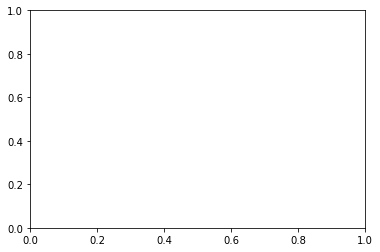

In [729]:
plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

In [730]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)

ValueError: operands could not be broadcast together with shapes (2,) (12,) 

In [731]:
pd.options.display.float_format = "{:,.5f}".format



In [732]:
coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])
coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df.head(10)
#print(coefficients_df.head(10))

,Feature,Coefficient
156,cinematographer_Thomas Mauch tv_series,-0.03438
155,cinematographer_Thomas Mauch documentary,-0.03438
187,tv_series Werner Herzog,0.02956
130,cinematographer_Peter Zeitlinger documentary,0.02702
132,cinematographer_Peter Zeitlinger Werner Herzog,0.02683
178,documentary Werner Herzog,0.02550
158,cinematographer_Thomas Mauch Klaus Kinski,0.02275
161,cinematographer_Thomas Mauch Peter Berling,0.02275
131,cinematographer_Peter Zeitlinger tv_series,0.02205
195,Werner Herzog^2,0.02140


In [733]:
Lasso_CV_model_w_budget = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Lasso_CV_model_w_budget 

{'r2_score': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 'mean absolute error': 0.6180286964290235,
 'coefficients':                                                Feature  Coefficient
 156             cinematographer_Thomas Mauch tv_series     -0.03438
 155           cinematographer_Thomas Mauch documentary     -0.03438
 187                            tv_series Werner Herzog      0.02956
 130       cinematographer_Peter Zeitlinger documentary      0.02702
 132     cinematographer_Peter Zeitlinger Werner Herzog      0.02683
 ..                                                 ...          ...
 134   cinematographer_Peter Zeitlinger Volker Prechtel      0.00000
 129  cinematographer_Peter Zeitlinger cinematograph...      0.00000
 128  cinematographer_Peter Zeitlinger cinematograph...      0.00000
 127  cinematographer_Peter Zeitlinger cinematograph...      0.00000
 115  cinematographer_OTHER cinematographer_Werne

In [734]:
LCVM_w_budget_filename = 'Lasso_CV_model_w_budget_poly_' + director
with open(dir_str + LCVM_w_budget_filename, 'wb') as to_write:
    pickle.dump(Lasso_CV_model_w_budget, to_write)

### Ridge regression

In [ ]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train_val)

# This is the best alpha value it found 
ridge_model.alpha_

In [ ]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
coefficients = list(zip(X_train_val_combo_poly_columns, ridge_model.coef_))


In [ ]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_te)

In [ ]:
# Find the MAE and R^2 on the test set using this model
mean_absolute_error = mae(y_test, test_set_pred)
mean_absolute_error

In [ ]:
r2_score_ = r2_score(y_test, test_set_pred)
r2_score_ 

In [ ]:

plt.scatter( test_set_pred, y_test)
plt.plot( y_test, y_test, c='k')

In [ ]:
residual = y_test-test_set_pred
plt.scatter( test_set_pred, residual)

In [ ]:
coefficients_df  = pd.DataFrame(coefficients, columns=['Feature', 'Coefficient'])
coefficients_df['abs_val_of_coefficient'] = coefficients_df.Coefficient.abs()
coefficients_df.sort_values(by='abs_val_of_coefficient', ascending=False, inplace=True)

coefficients_df.drop(columns='abs_val_of_coefficient', inplace=True)
coefficients_df.head(10)

In [ ]:
Ridge_CV_model_w_budget = {"r2_score": r2_score, 'mean absolute error': mean_absolute_error, 'coefficients': coefficients_df}
Ridge_CV_model_w_budget 

In [ ]:
RCVM_w_budget_filename = 'Ridge_CV_model_w_budget_poly_' + director +'.pickle'
with open(dir_str + RCVM_w_budget_filename, 'wb') as to_write:
    pickle.dump(Ridge_CV_model_w_budget, to_write)

In [ ]:
'Lasso_CV_model_w_budget_poly_godard.pickle'